In [22]:
import pandas as pd
data = pd.read_csv('train.csv')

In [23]:
#vemos los valores nulos:
data.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [24]:
df_cleaned = data.dropna()


In [26]:
#vemos que ya no hay  valores nulos:
df_cleaned.isna().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

Ej3

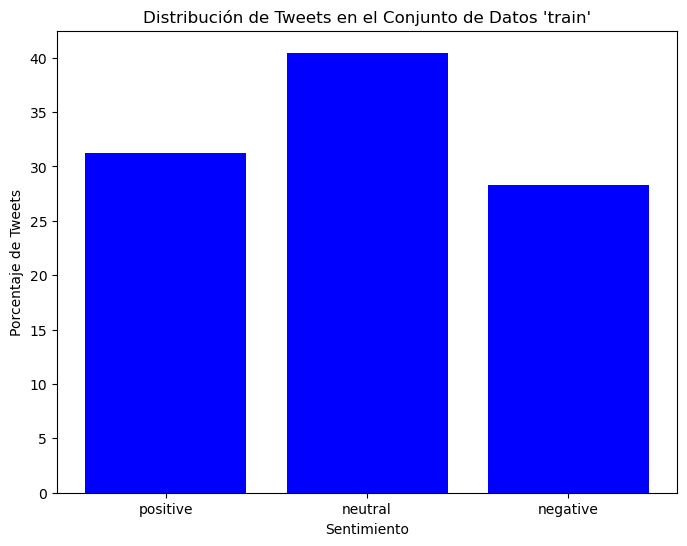

In [28]:
import matplotlib.pyplot as plt

sentiment_counts = df_cleaned["sentiment"].value_counts()

# Crear una lista ordenada de las categorías de sentimiento
sentiments = ["positive", "neutral", "negative"]

# Calcular los porcentajes relativos a la cantidad total de tweets
tweet_percentages = [sentiment_counts[sentiment] / len(df_cleaned) * 100 for sentiment in sentiments]

# Crear un gráfico de embudo
plt.figure(figsize=(8, 6))
plt.bar(sentiments, tweet_percentages, color="blue")
plt.xlabel("Sentimiento")
plt.ylabel("Porcentaje de Tweets")
plt.title("Distribución de Tweets en el Conjunto de Datos 'train'")
plt.show()

In [31]:
def jaccard(str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

# Aplicar la función jaccard a los datos y calcular la diferencia en el número de palabras
df_cleaned["word_difference"] = df_cleaned.apply(lambda row: abs(len(row["selected_text"].split()) - len(row["text"].split())), axis=1)
df_cleaned["jaccard_similarity"] = df_cleaned.apply(lambda row: jaccard(row["text"], row["selected_text"]), axis=1)

print(df_cleaned.head())


C:\Users\Angel Martínez\AppData\Local\Temp\ipykernel_31532\2392185360.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["word_difference"] = df_cleaned.apply(lambda row: abs(len(row["selected_text"].split()) - len(row["text"].split())), axis=1)


       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  word_difference  \
0  I`d have responded, if I were going   neutral                0   
1                             Sooo SAD  negative                8   
2                          bullying me  negative                3   
3                       leave me alone  negative                2   
4                        Sons of ****,  negative               11   

   jaccard_similarity  
0            1.000000  
1            0.200000  
2            0.166667  
3            0.600000  
4            0.214286  


C:\Users\Angel Martínez\AppData\Local\Temp\ipykernel_31532\2392185360.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["jaccard_similarity"] = df_cleaned.apply(lambda row: jaccard(row["text"], row["selected_text"]), axis=1)


In [32]:
# Calcular la curtosis y asimetría para cada categoría de sentimiento
curtosis = df_cleaned.groupby("sentiment")["word_difference"].apply(lambda x: x.kurtosis())
skewness = df_cleaned.groupby("sentiment")["word_difference"].apply(lambda x: x.skew())

# Visualizar los resultados
print("Curtosis:")
print(curtosis)
print("\nAsimetría:")
print(skewness)

Curtosis:
sentiment
negative    -0.743445
neutral     74.549069
positive    -0.767361
Name: word_difference, dtype: float64

Asimetría:
sentiment
negative    0.442730
neutral     8.074509
positive    0.413826
Name: word_difference, dtype: float64


In [33]:
# Encontrar tweets con puntuaciones de similitud de Jaccard cercanas a 1
high_similarity_tweets = df_cleaned[df_cleaned["jaccard_similarity"] >= 0.9]


print(high_similarity_tweets.head())

        textID                                               text  \
0   cb774db0d1                I`d have responded, if I were going   
5   28b57f3990  http://www.dothebouncy.com/smf - some shameles...   
7   50e14c0bb8                                         Soooo high   
8   e050245fbd                                        Both of you   
10  2339a9b08b   as much as i love to be hopeful, i reckon the...   

                                        selected_text sentiment  \
0                 I`d have responded, if I were going   neutral   
5   http://www.dothebouncy.com/smf - some shameles...   neutral   
7                                          Soooo high   neutral   
8                                         Both of you   neutral   
10  as much as i love to be hopeful, i reckon the ...   neutral   

    word_difference  jaccard_similarity  
0                 0                 1.0  
5                 0                 1.0  
7                 0                 1.0  
8             